True
../PickleFiles/SimulationInfo.MerianCDM.pickle
Processing simulation: r431
Stellar b/a: 0.9, c/a: 0.2


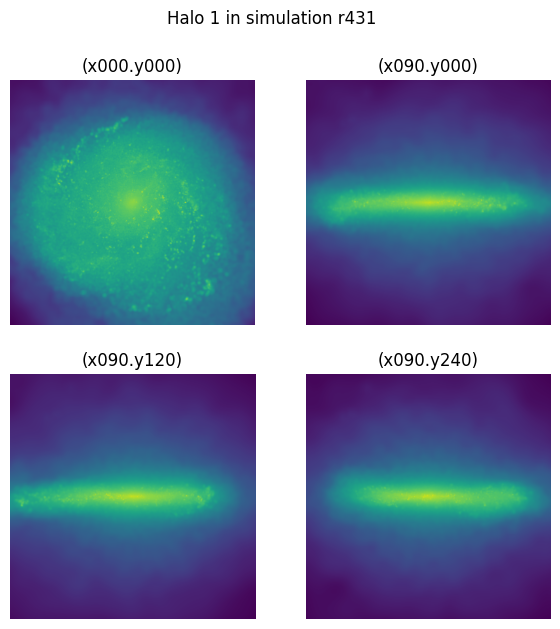

Exiting early.
True
../PickleFiles/SimulationInfo.BWMDC.pickle
Processing simulation: cptmarvel
Stellar b/a: 0.8, c/a: 0.4


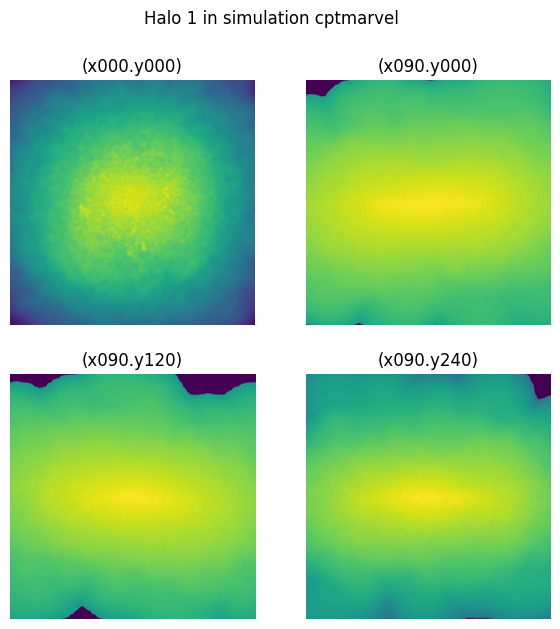

Stellar b/a: 0.7, c/a: 0.3


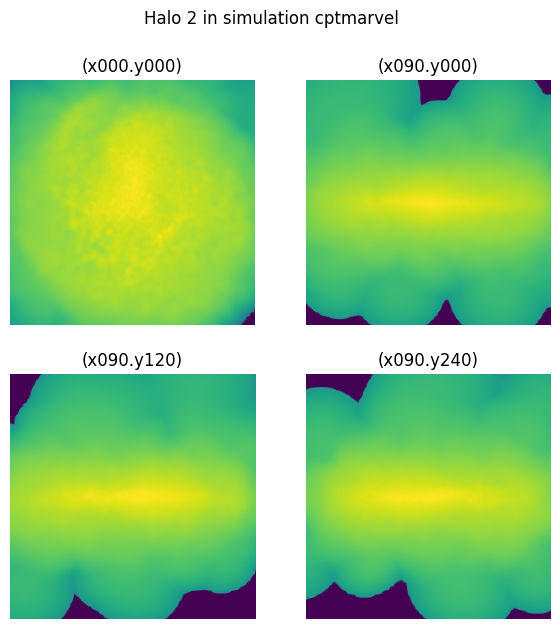

Stellar b/a: 0.8, c/a: 0.6


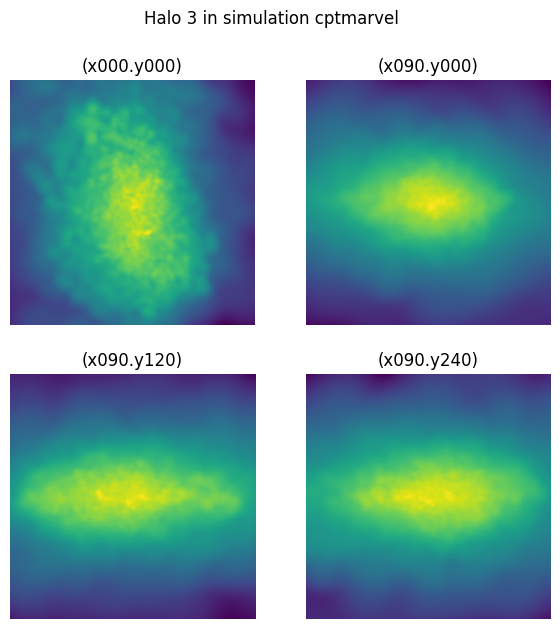

Stellar b/a: 0.7, c/a: 0.6


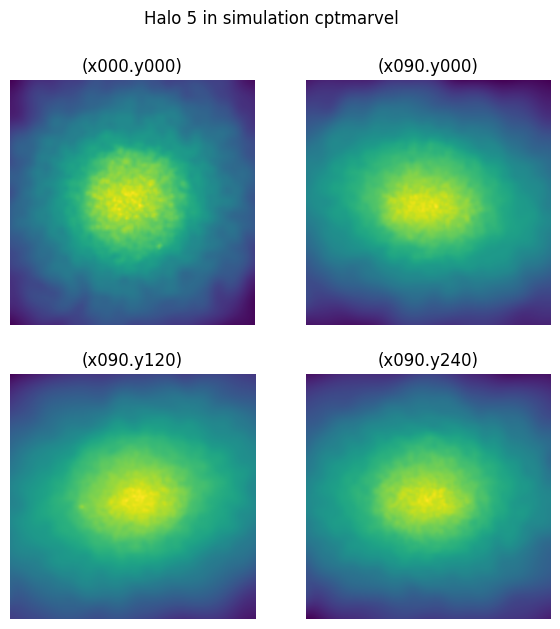

Stellar b/a: 0.9, c/a: 0.8


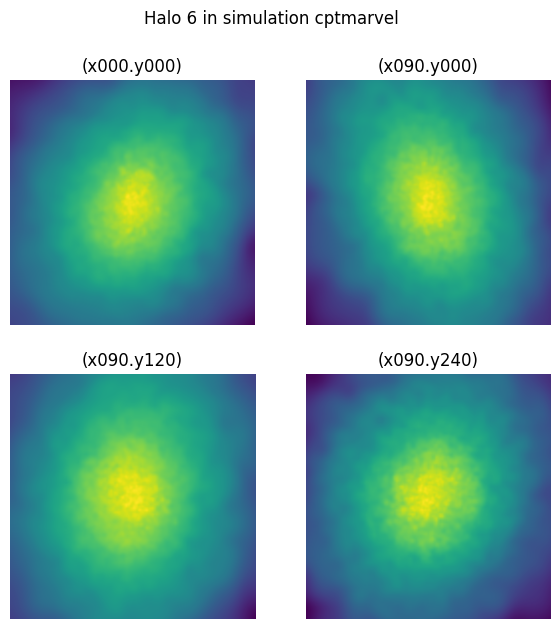

Stellar b/a: 0.7, c/a: 0.3


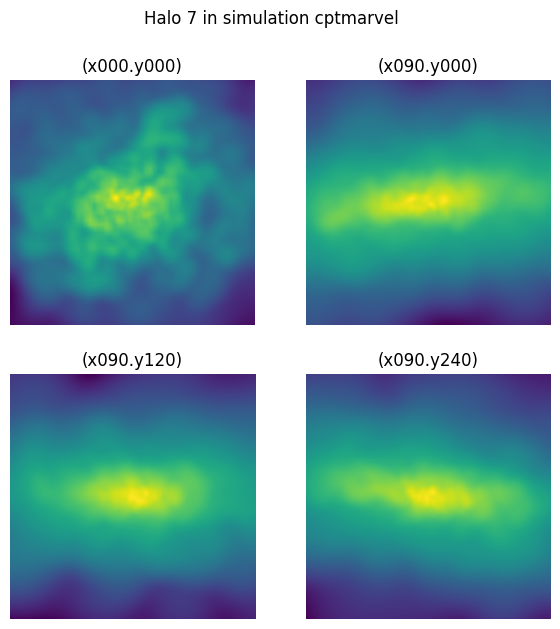

Stellar b/a: 0.2, c/a: 0.1


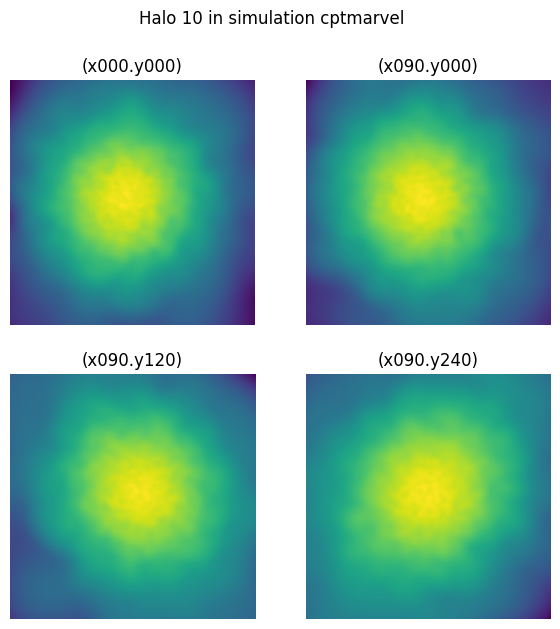

Processing simulation: elektra
Stellar b/a: 0.7, c/a: 0.5


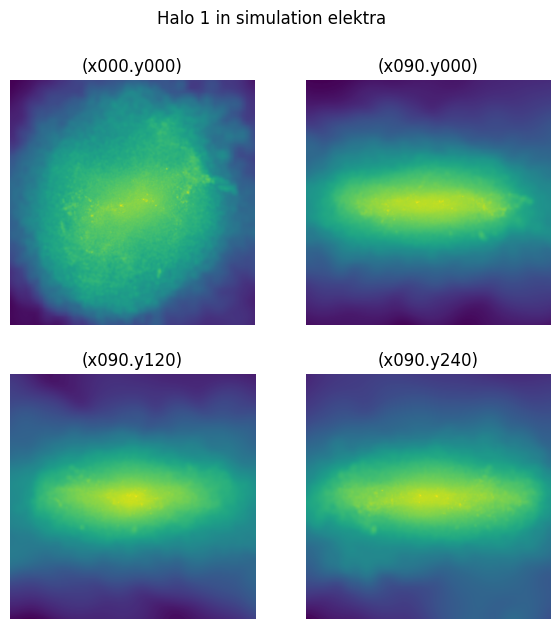

Stellar b/a: 0.9, c/a: 0.8


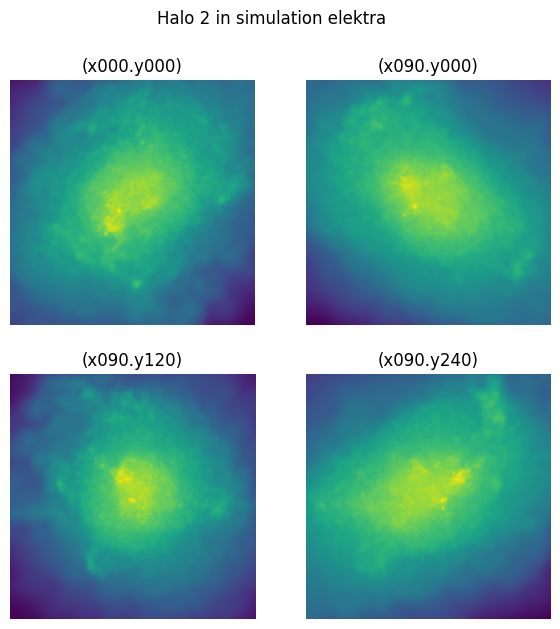

Stellar b/a: 0.7, c/a: 0.5


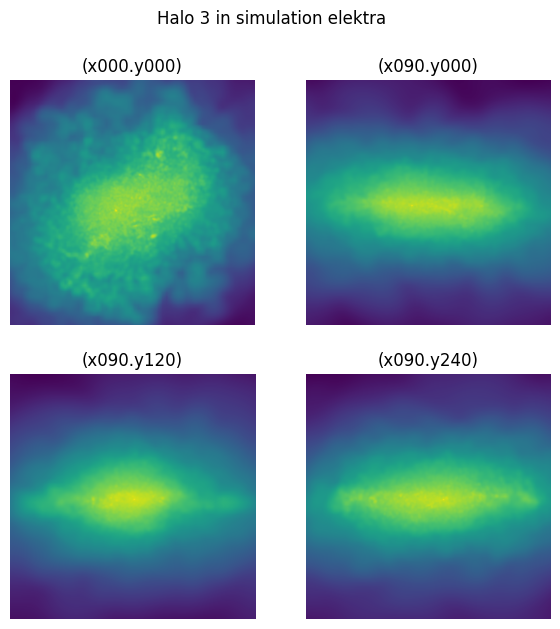

Stellar b/a: 0.6, c/a: 0.5


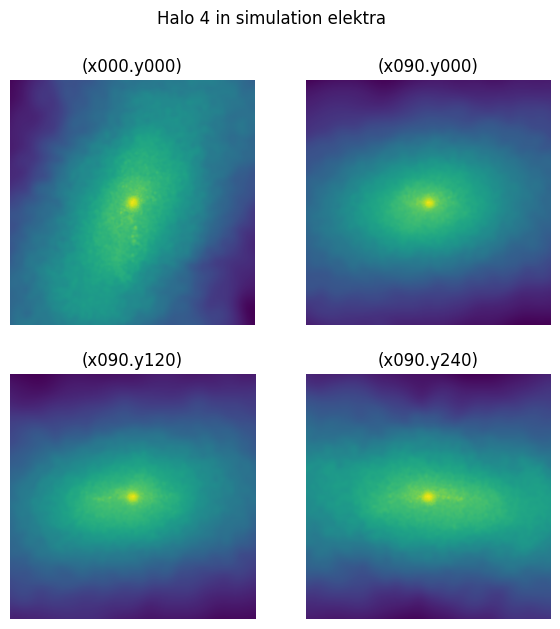

Stellar b/a: 0.9, c/a: 0.8


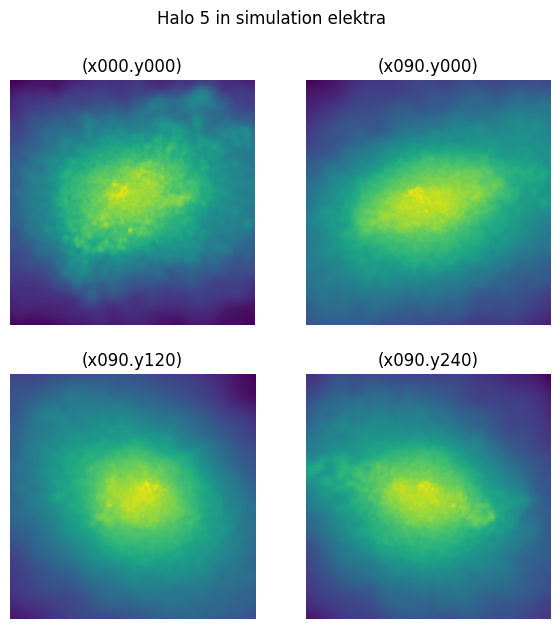

Stellar b/a: 0.9, c/a: 0.8


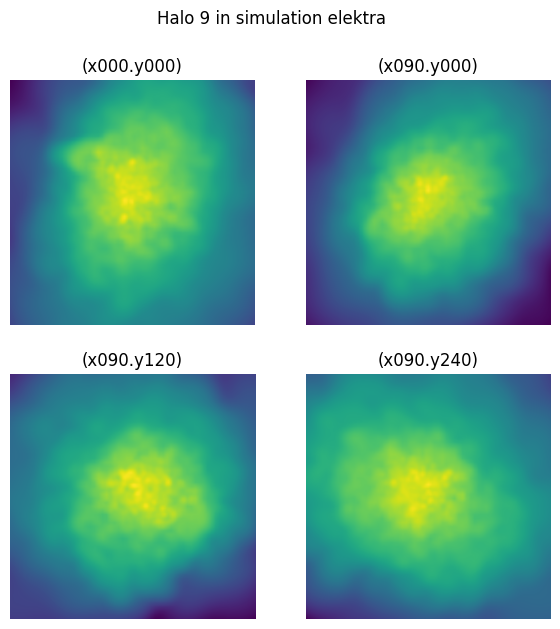

Stellar b/a: 0.7, c/a: 0.6


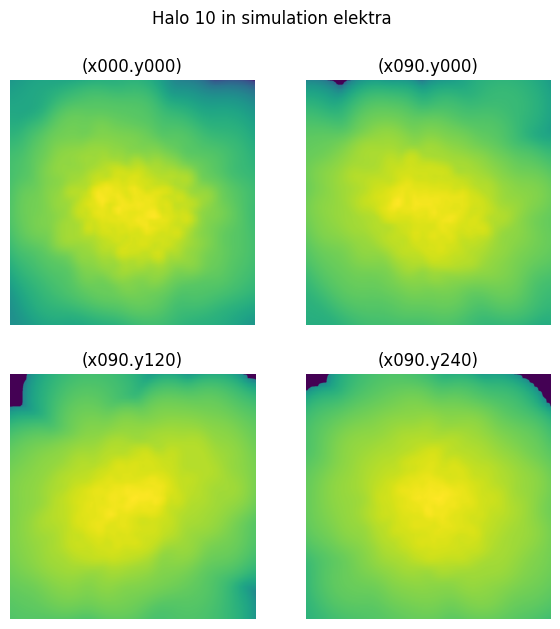

Processing simulation: storm
Stellar b/a: 0.8, c/a: 0.4


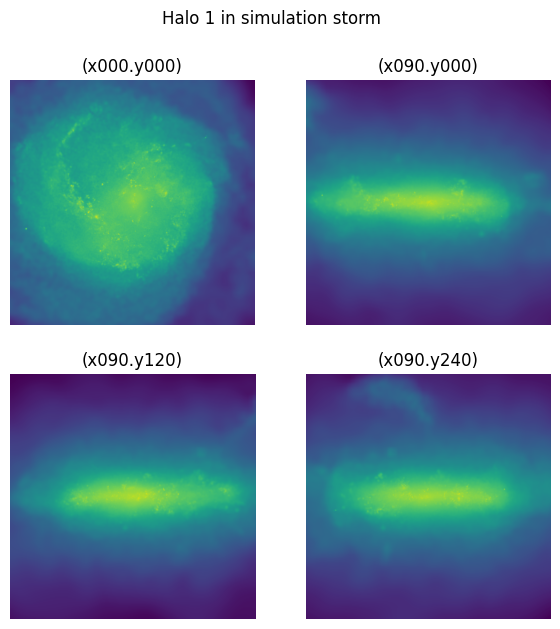

Stellar b/a: 0.7, c/a: 0.3


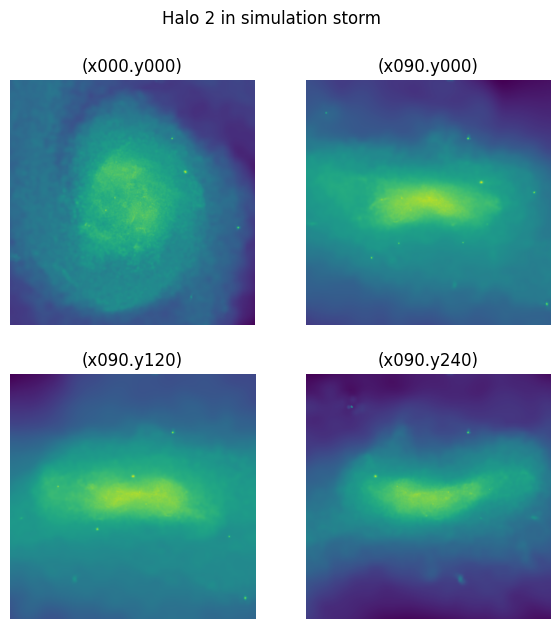

Stellar b/a: 0.8, c/a: 0.5


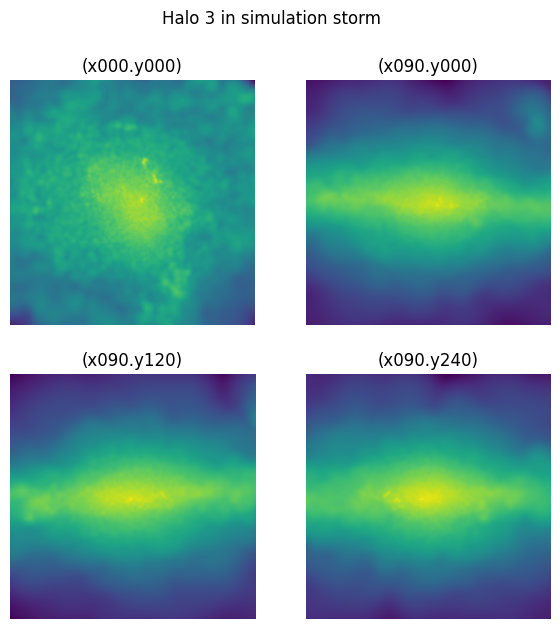

Stellar b/a: 0.8, c/a: 0.4


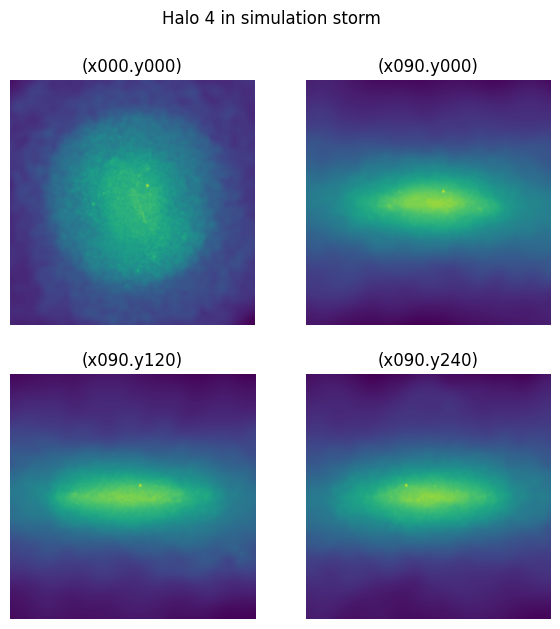

Stellar b/a: 0.8, c/a: 0.8


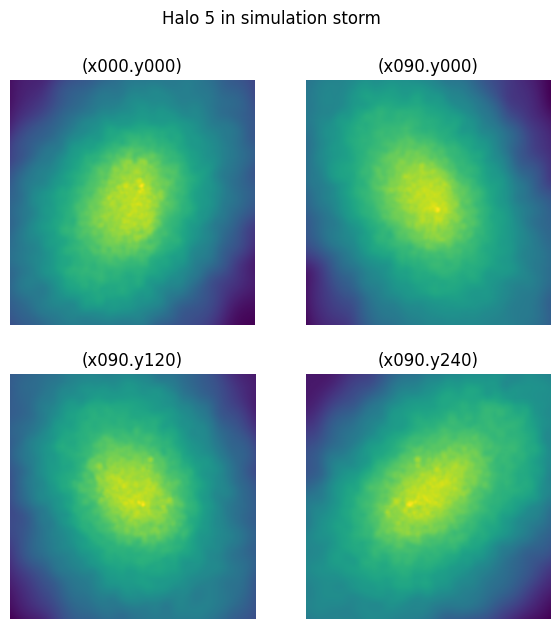

Stellar b/a: 0.7, c/a: 0.6


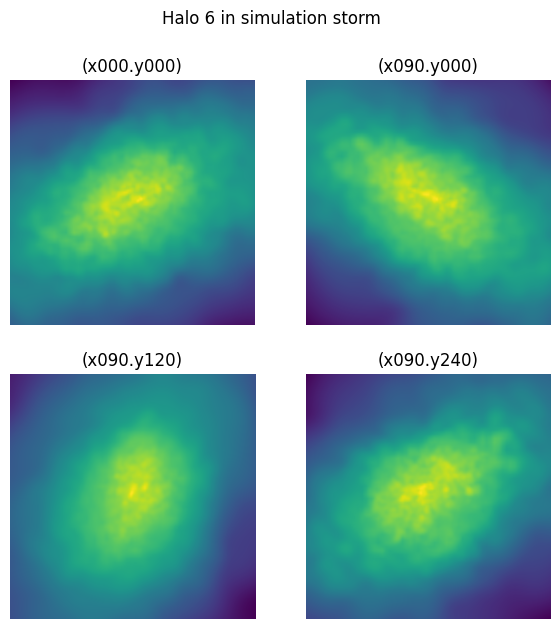

Stellar b/a: 0.9, c/a: 0.6


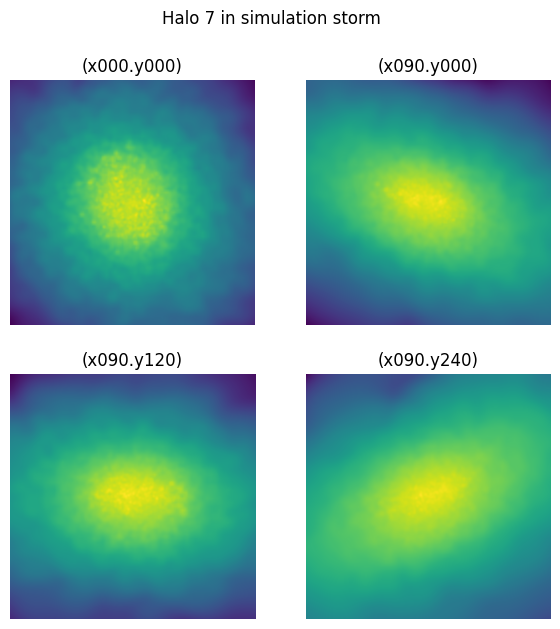

Stellar b/a: 0.6, c/a: 0.5


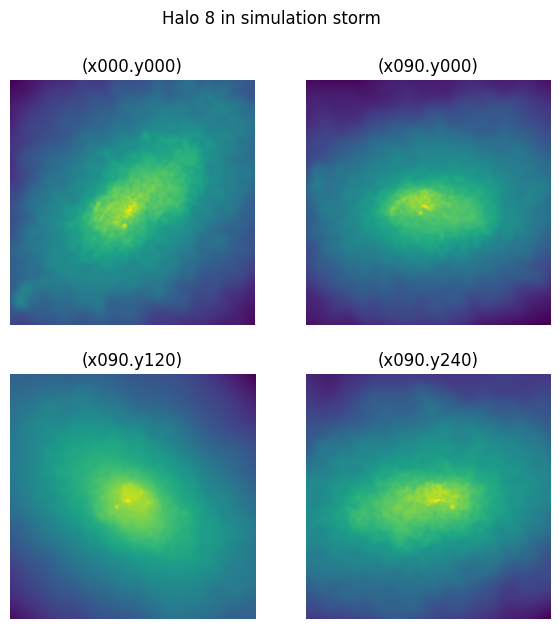

Stellar b/a: 0.8, c/a: 0.6


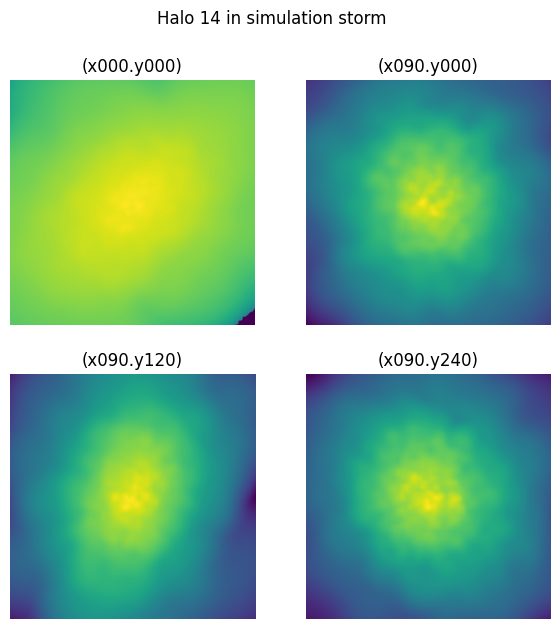

Stellar b/a: 0.9, c/a: 0.7


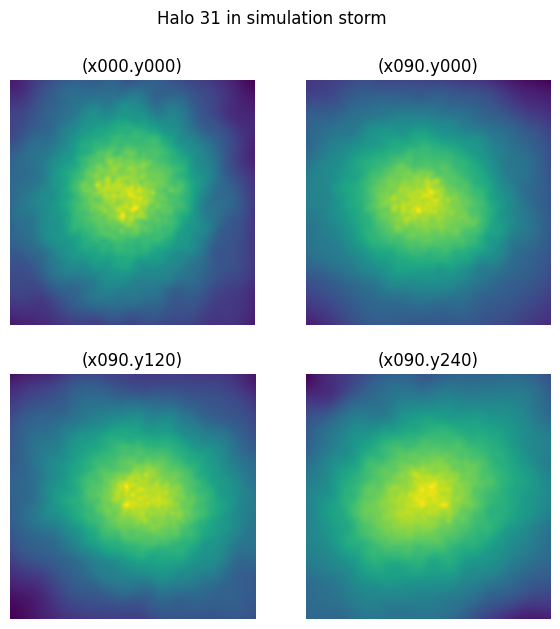

Processing simulation: rogue
Error loading image for halo 1
Traceback (most recent call last):
  File "/tmp/ipykernel_1951575/1850845100.py", line 46, in <module>
    img = Image.open(f'../../Figures/Images/{sim}.{feedback}/{hid}/{hid}.{rot}.png')
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/PIL/Image.py", line 3431, in open
    fp = builtins.open(filename, "rb")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/home/bk639/MorphologyMeasurements/Figures/Images/rogue.BWMDC/1/1.x090.y000.png'

Stellar b/a: 0.8, c/a: 0.3


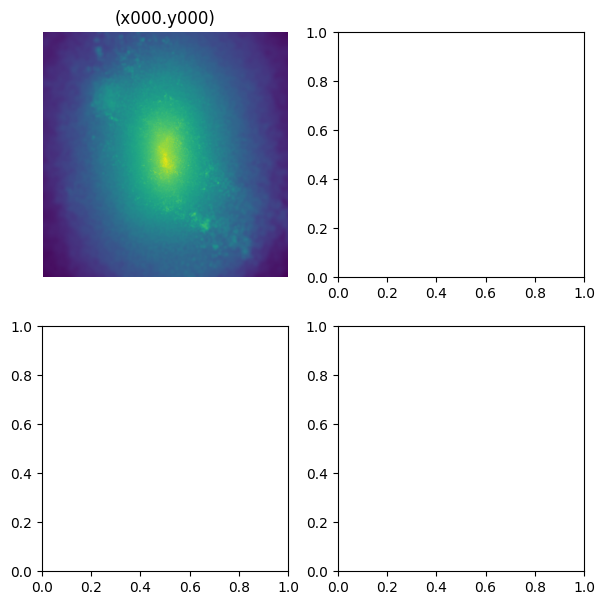

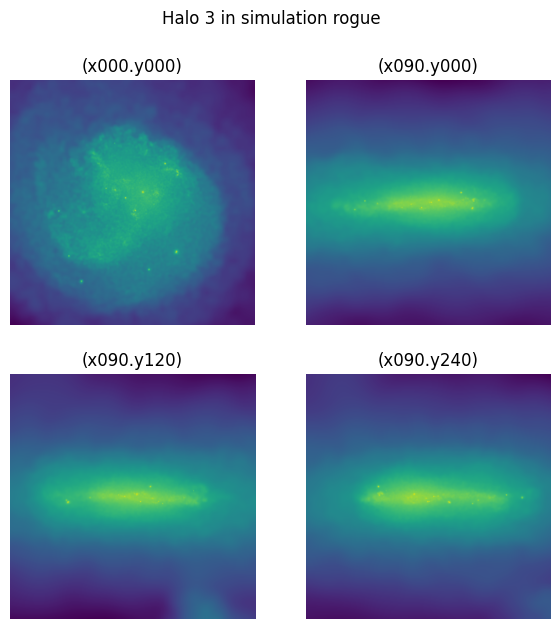

Stellar b/a: 0.9, c/a: 0.8


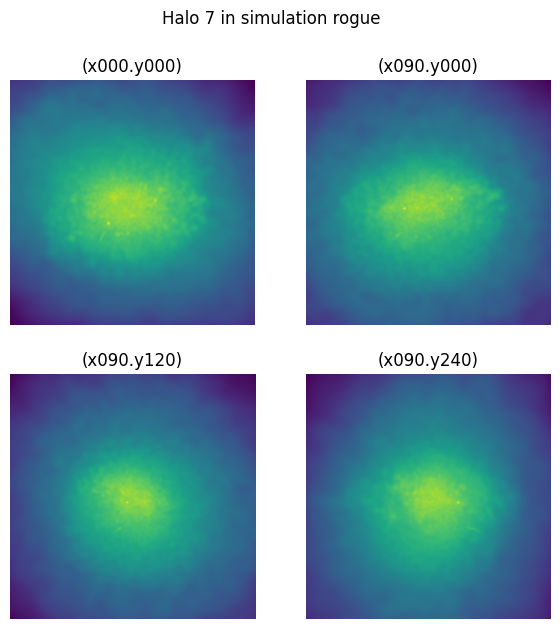

Stellar b/a: 1.0, c/a: 0.7


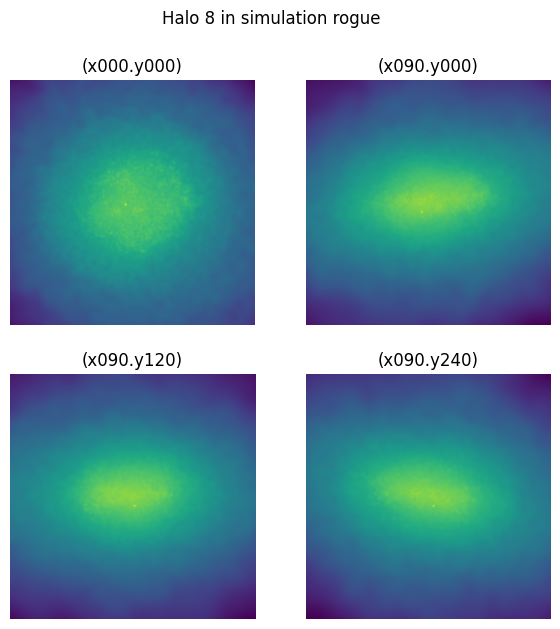

Stellar b/a: 0.8, c/a: 0.6


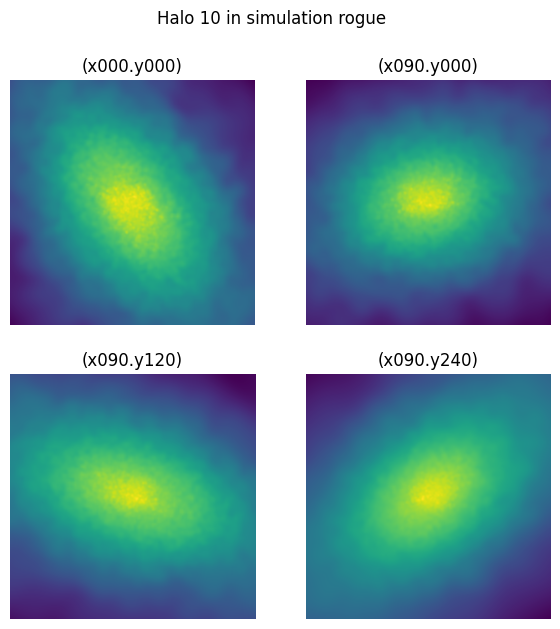

Error loading image for halo 11
Traceback (most recent call last):
  File "/tmp/ipykernel_1951575/1850845100.py", line 46, in <module>
    img = Image.open(f'../../Figures/Images/{sim}.{feedback}/{hid}/{hid}.{rot}.png')
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/PIL/Image.py", line 3431, in open
    fp = builtins.open(filename, "rb")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/home/bk639/MorphologyMeasurements/Figures/Images/rogue.BWMDC/11/11.x090.y000.png'

Stellar b/a: 0.8, c/a: 0.6


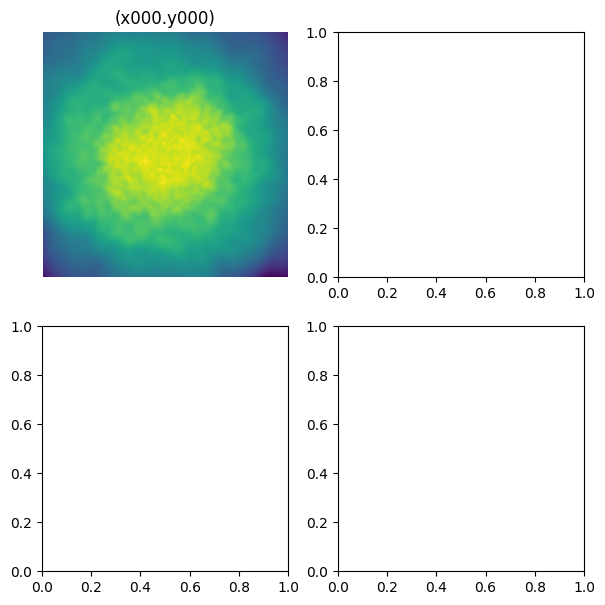

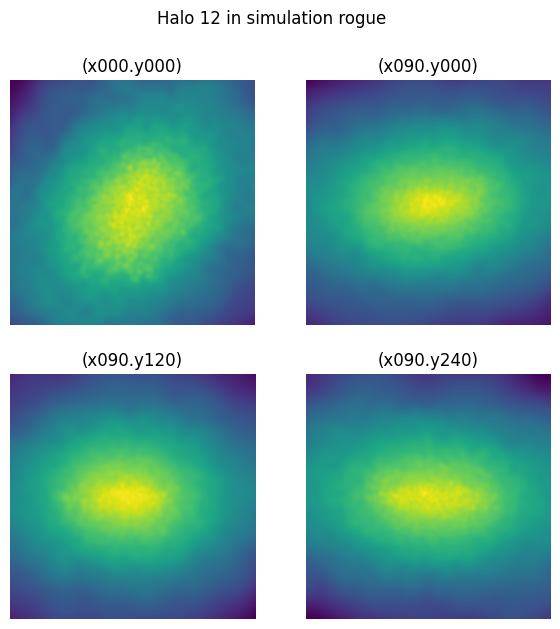

Stellar b/a: 0.8, c/a: 0.6


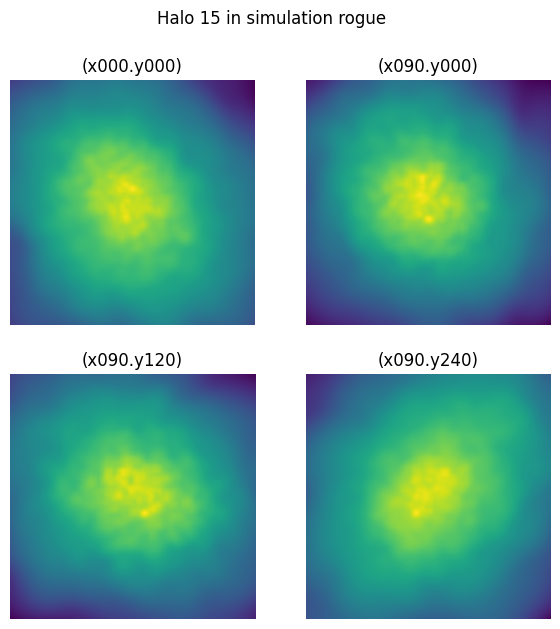

Stellar b/a: 0.8, c/a: 0.6


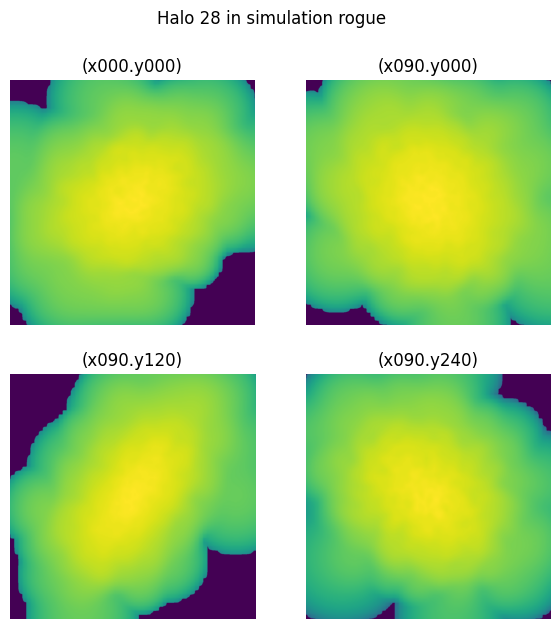

Processing simulation: h148
Stellar b/a: 0.7, c/a: 0.5


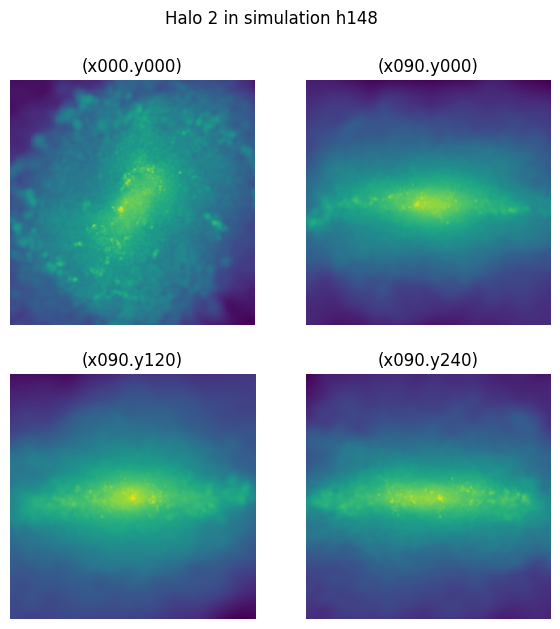

Stellar b/a: 0.8, c/a: 0.4


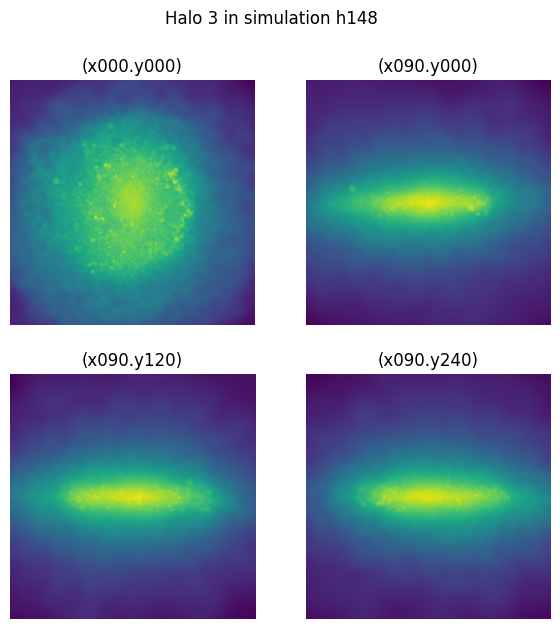

Exiting early.
Classification complete. Results saved.


In [3]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display, clear_output
import traceback



import os
import pickle
import traceback
from PIL import Image
import matplotlib.pyplot as plt

feedbacks = ['MerianCDM','BWMDC']
classifications = ['d', 'e', 'i']
output_folder = '../../Figures/Images/Classified'

for feedback in feedbacks:
    pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
    classified_galaxies = {}

    print(os.path.exists(pickle_path))
    print(pickle_path)
    if os.path.exists(pickle_path):
        sims = pickle.load(open(pickle_path, 'rb'))
        for sim in sims:
            try:
                DMShapes = pickle.load(open(f'../../Data/{sim}.{feedback}.DMShapes.pickle', 'rb'))
                StShapes = pickle.load(open(f'../../Data/{sim}.{feedback}.3DShapes.pickle', 'rb'))
                Profiles = pickle.load(open(f'../../Data/{sim}.{feedback}.Profiles.pickle', 'rb'))
            except:
                print(f"Error loading shapes for simulation {sim}")
                continue

            classified_galaxies[sim] = {}
            print(f"Processing simulation: {sim}")

            for hid in sims[sim]['goodhalos']:
                fig, axs = plt.subplots(2, 2, figsize=(7, 7))
                axs = axs.flatten()
                rotations = ['x000.y000','x090.y000','x090.y120','x090.y240']

                try:
                    for i, rot in enumerate(rotations):
                        img = Image.open(f'../../Figures/Images/{sim}.{feedback}/{hid}/{hid}.{rot}.png')
                        axs[i].imshow(img)
                        axs[i].set_title(f'({rot})')
                        axs[i].axis('off')

                    fig.suptitle(f'Halo {hid} in simulation {sim}')
                except:
                    print(f"Error loading image for halo {hid}")
                    print(traceback.format_exc())
                    continue

                try:
                    Reff = Profiles[str(hid)]['x000y000']['Reff']
                    ba = StShapes[str(hid)]["ba_smooth"](Reff)
                    ca = StShapes[str(hid)]["ca_smooth"](Reff)
                    print(f'Stellar b/a: {ba:.1f}, c/a: {ca:.1f}')
                except:
                    print(f"Error getting b/a, c/a for halo {hid}")

                #get fraction of baryonic particles in disk


                plt.show()
                plt.pause(0.2)

                while True:
                    user_input = input(f"Classify this galaxy disk,irrgular,ellipcital d/i/e or quit").lower()
                    if user_input in classifications or user_input == 'quit':
                        break
                    print(f"Invalid input. Please enter one of {', '.join(classifications)}, or 'quit'.")

                if user_input == 'quit':
                    print("Exiting early.")
                    break

                classified_galaxies[sim][hid] = user_input
                fig.suptitle(f'Halo {hid} in simulation {sim} is {user_input}')

                # Create the output folder if it doesn't exist
                os.makedirs(output_folder, exist_ok=True)

                # Save the image in the classified folder
                output_file = f'{output_folder}/{sim}.{feedback}.{hid}.{user_input}.png'
                fig.savefig(output_file)

                plt.close(fig)

            if user_input == 'quit':
                break

    # Save the classification results
    with open(f'galaxy_classifications_{feedback}.pickle', 'wb') as f:
        pickle.dump(classified_galaxies, f)

print("Classification complete. Results saved.")

# print("Final results:")
# print(disk_sims)
# results_file = f'disk_sims_results.pickle'
# # Save the final results to a pickle file
# with open(results_file, 'wb') as f:
#     pickle.dump(disk_sims, f)
#
# print(f"Results saved to {results_file}")

In [20]:
file = '/home/bk639/MorphologyMeasurements/Figures/Images/r431.MerianCDM/1/1.x000y000.png'
file = '/home/bk639/MorphologyMeasurements/Figures/Images/r431.MerianCDM/1/1.x000.y000.png'
#see if file exists
print(os.path.exists(file))


True


In [7]:
#display results of pickle file 
import re
disks = {}
results_file = 'disk_sims_results.pickle'
with open(results_file, 'rb') as f:
    disk_sims = pickle.load(f)
    #append sim halo to list of sims, only for sims of the form rXXX or rXXXX using match string for numbers only
    for sim in disk_sims:
        if re.match(r'r\d{3,4}', sim):
            if sim not in disks:
                disks[sim] = []
            for hid in disk_sims[sim]:
                if disk_sims[sim][hid]:
                    disks[sim].append(hid)
print(disks)

{'r431': [1], 'r442': [1], 'r468': [1], 'r488': [1], 'r489': [1], 'r492': [1], 'r502': [1], 'r515': [1], 'r523': [1], 'r544': [1], 'r552': [1], 'r555': [1], 'r556': [1], 'r563': [1], 'r568': [1], 'r569': [1], 'r571': [1], 'r597': [1], 'r613': [1], 'r614': [1], 'r615': [1], 'r618': [1], 'r634': [1], 'r642': [1], 'r656': [1], 'r707': [], 'r716': [1], 'r718': [1], 'r753': [1], 'r761': [1], 'r850': [1], 'r852': [1], 'r886': [1], 'r916': [1], 'r918': [1], 'r977': [1]}


In [11]:
#cd /home/bk639/MorphologyMeasurements/Code/IntrinsicShapes

/home/bk639/MorphologyMeasurements/Code/IntrinsicShapes


/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import re
from tangos.input_handlers import finding


# examples strs 1023.romulus25.3072g1HsbBH.000076  r1023.romulus25.3072g1HsbBH.001056
test_str = 'r1023.romulus25.3072g1HsbBH.000096/ahf_200/r1023.romulus25.3072g1HsbBH.000096'

snapshot_pattern = ['/*.00[0-9][0-9][0-9][0-9]']
#snapshot_pattern = ['*']
exclude_pattern = ['*.startrun', 'tipsy.info', '*.AHF*','*.parameter','*ahf_200*']
#exclude_pattern = []
base = '/data/REPOSITORY/romulus_zooms/r1023.romulus25.3072g1HsbBH'
results = sorted(finding.find(basename=base + "/", patterns=snapshot_pattern, ignore=exclude_pattern))

print(results)
print(len(results))

#if snapshot_pattern.match(test_str) and not exclude_pattern.match(test_str):
    #print('Matched')
